<a href="https://colab.research.google.com/github/dirkh24/MNIST_Classifications/blob/master/MNIST_Fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
# Import MNIST fashion example
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [0]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

X_train = x_train / 255
X_test = x_test / 255

X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [0]:
from keras.utils import to_categorical

In [0]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [0]:
model = Sequential()
# input: 28x100 images with 3 channels -> (28, 28, 1) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [8]:
#model.fit(X_train, Y_train, batch_size=32, epochs=10)
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 150s 3ms/step - loss: 0.7433 - acc: 0.7200 - val_loss: 0.4595 - val_acc: 0.8298
Epoch 2/10
48000/48000 [==============================] - 153s 3ms/step - loss: 0.4751 - acc: 0.8242 - val_loss: 0.3537 - val_acc: 0.8709
Epoch 3/10
48000/48000 [==============================] - 154s 3ms/step - loss: 0.4063 - acc: 0.8508 - val_loss: 0.3074 - val_acc: 0.8858
Epoch 4/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.3655 - acc: 0.8667 - val_loss: 0.2875 - val_acc: 0.8948
Epoch 5/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.3443 - acc: 0.8722 - val_loss: 0.2787 - val_acc: 0.8956
Epoch 6/10
48000/48000 [==============================] - 158s 3ms/step - loss: 0.3224 - acc: 0.8825 - val_loss: 0.2769 - val_acc: 0.8975
Epoch 7/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.3093 - acc: 0.8852 - val_loss: 0.2820 - 

In [9]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print(score)

10000/10000 [==============================] - 7s 724us/step
[0.26581206064224244, 0.9011]


In [0]:
import matplotlib.pyplot as plt
from random import randint

Modelprediction: Coat


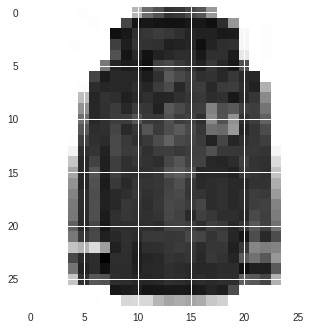

In [29]:
number = randint(0,len(x_test))
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
predictions = model.predict(X_test[number].reshape(1,28,28,1))
print("Modelprediction: " + labels[predictions.argmax()])
plt.imshow(x_test[number],cmap='gray_r')